In [1]:
%pylab inline
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)

Populating the interactive namespace from numpy and matplotlib


In [2]:
factors = ['BHLHE40','CEBPB','CTCF','E2F4','EBF1','ELF1','ELK1','ETS1','FOS','IRF4','JunD','Max','MEF2A','MEF2C','Mxi1','NFIC','NFKB','NFYA','NFYB','Nrf1','NRSF','PAX5','PBX3','POU2F2','PU1','RFX5','RUNX3','SP1','SRF','STAT1','STAT3','TCF3','USF1','USF2','YY1','ZBTB33','ZEB1','Znf143']
orcols = ["OR_%s"%f for f in factors]

def LoadKmer(fpath):
    max_kmers = [] # keep track of best kmers for each factor
    fdata = pd.read_csv(fpath%factors[0], sep="\t", usecols=[0,1,2], names=["kmer","pval_%s"%factors[0],"OR_%s"%factors[0]])
    for val_idx in range(10):
        max_kmers.append(fdata.sort_values("OR_%s"%factors[0], ascending=False)["kmer"].values[val_idx])
    for i in range(1, len(factors)):
        ff = pd.read_csv(fpath%factors[i], sep="\t", usecols=[0,1,2], names=["kmer","pval_%s"%factors[i],"OR_%s"%factors[i]])
        fdata = pd.merge(ff, fdata, on=["kmer"], how="right")
        for val_idx in range(10):
            max_kmers.append(fdata.sort_values("OR_%s"%factors[i], ascending=False)["kmer"].values[val_idx])
    max_kmers = set(max_kmers)
    ORdata = fdata[["kmer"]+orcols]
    ORdata.index = ORdata["kmer"]
    max_kmers = max_kmers.union(set(ORdata["kmer"][ORdata[orcols].apply(max, 1)>10]))
    return ORdata, max_kmers

In [3]:
fpath = "/storage/pandaman/project/AgentBind-GM12878-analysis/results/c/%s+GM12878/kmer_ranking.txt"
ORdata, max_kmers = LoadKmer(fpath)

fpath_good = "/storage/pandaman/project/AgentBind-GM12878-analysis/results-proximal-distal/c/%s+GM12878/prox/kmer_ranking.txt"
ORdata_good, max_kmers_good = LoadKmer(fpath_good)

fpath_bad = "/storage/pandaman/project/AgentBind-GM12878-analysis/results-proximal-distal/c/%s+GM12878/dist/kmer_ranking.txt"
ORdata_bad, max_kmers_bad = LoadKmer(fpath_bad)

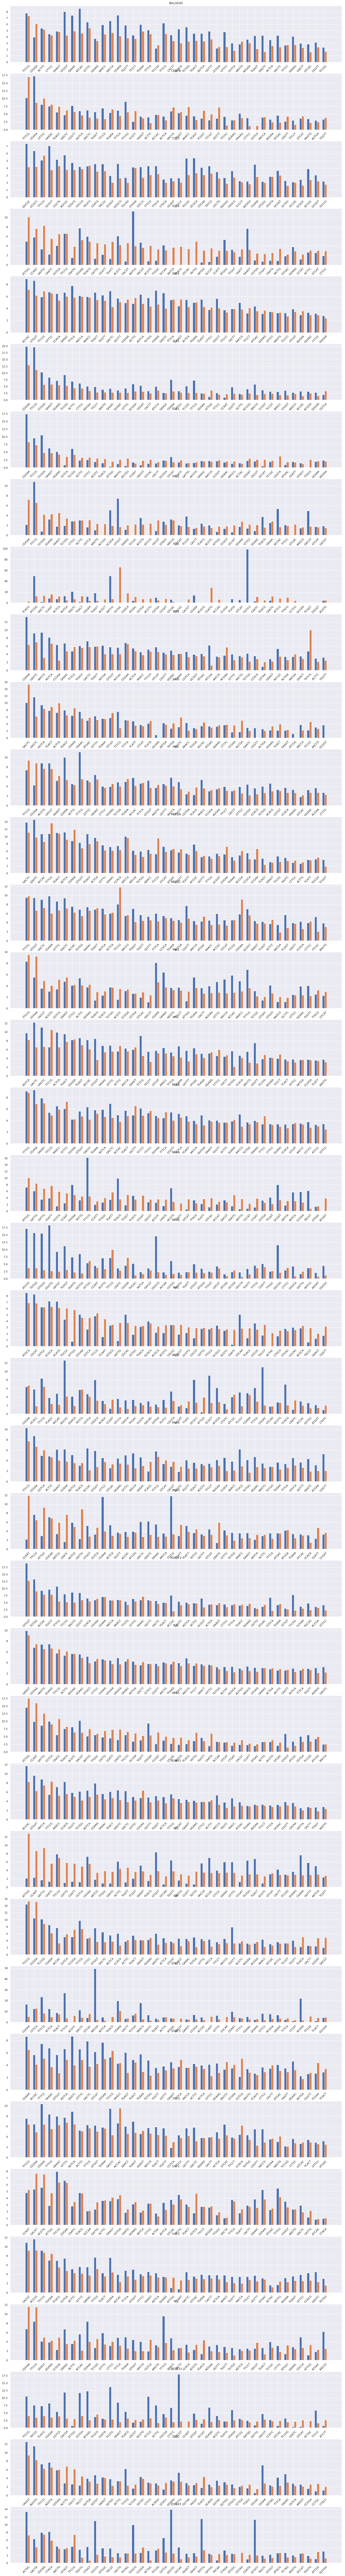

In [5]:
merged = pd.merge(pd.merge(ORdata_bad, ORdata_good, on=["kmer"], suffixes=("_bad","_good")), ORdata, on=["kmer"])

fig = plt.figure()
fig.set_size_inches((24, 5*38))
counter  = 0
for factor in factors:
    counter += 1
    xx = merged[["kmer","OR_%s_good"%factor,"OR_%s_bad"%factor,"OR_%s"%factor]]
    
    
    ax = fig.add_subplot(38,1,counter)
    xx = xx.sort_values("OR_%s"%factor, ascending=False).head(n=40)
    w = 0.3
    ax.bar(range(xx.shape[0]), xx["OR_%s_bad"%factor], width=w)
    ax.bar([item+w for item in range(xx.shape[0])], xx["OR_%s_good"%factor], width=w)
    ax.set_title(factor)
    ax.set_xticks(range(xx.shape[0]))
    ax.set_xticklabels(xx["kmer"], rotation=45)
fig.savefig("prox_vs_dist.pdf")